In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import seaborn as sns

# DATA SET: Chicago's Food Inspection

Chicago's Food Inspection Dataset is derived from a larger initiative from the local authorities of Chicago to make Government's data publicly available to everyone. Other similar datasets are available at https://data.cityofchicago.org

This dataset, in particular, is generated from inspections of restaurants and other food establishments in Chicago from January 1, 2010, to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP).

- __Data Owner__: Chicago Department of Public Health
- __Time Period__: 2010 - Present
- __Frequency__: This database was updated with information from new inspections each Friday.


# DATA EXPLORATION

First of all, we are going to understand the dataset and its content. Initial analyis on the food-inspections dataset in Chicago follows below:

In [2]:
chicago_df = pd.read_csv('data/food-inspections.csv', delimiter=',')
chicago_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2320977,TODD APPEL BAR AND COCKTAIL,TODD APPEL BAR AND COCKTAIL,2589615.0,Grocery Store,Risk 2 (Medium),5868 N LINCOLN AVE,CHICAGO,IL,60659.0,...,No Entry,NaN,41.988060,-87.703704,"{'latitude': '-87.70370445181302', 'longitude'...",NaN,NaN,NaN,NaN,NaN
1,2320927,Sayre Language Acad.,Sayre Language Acad.,29271.0,School,Risk 1 (High),1850 N Newland,CHICAGO,IL,60707.0,...,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.914124,-87.798757,"{'latitude': '-87.79875666766955', 'longitude'...",NaN,NaN,NaN,NaN,NaN
2,2320911,Hitch Elementary School,Hitch Elementary School,23811.0,School,Risk 1 (High),5625 N McVicker (6032W),CHICAGO,IL,60646.0,...,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.983678,-87.779086,"{'latitude': '-87.77908614427155', 'longitude'...",NaN,NaN,NaN,NaN,NaN
3,2320918,BEEFSTEAK,BEEFSTEAK,2698445.0,Restaurant,Risk 1 (High),303 E SUPERIOR ST,CHICAGO,IL,60611.0,...,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,41.895692,-87.620143,"{'latitude': '-87.62014286048188', 'longitude'...",NaN,NaN,NaN,NaN,NaN
4,2320916,ST. CONSTANCE ELEMENTARY SCHOOL,ST. CONSTANCE ELEMENTARY SCHOOL,1878492.0,School,Risk 1 (High),5841 W STRONG,CHICAGO,IL,60630.0,...,No Entry,NaN,41.970176,-87.775099,"{'latitude': '-87.77509944904432', 'longitude'...",NaN,NaN,NaN,NaN,NaN


As we can see, this dataset has 12 different columns. The meaning for each of these columns is explained below:

- __DBA__: ‘Doing business as.’ This is legal name of the establishment.
- __AKA__: ‘Also known as.’ This is the name the public would know the establishment as.
- __License number__: This is a unique number assigned to the establishment for the purposes of licensing by the Department of Business Affairs and Consumer Protection.
- __Type of facility__: Each establishment is described by one of the following: bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop.
- __Risk category of facility__: Each establishment is categorized as to its risk of adversely affecting the public’s health, with 1 being the highest and 3 the lowest. The frequency of inspection is tied to this risk, with risk 1 establishments inspected most frequently and risk 3 least frequently.
- __Street address, city, state and zip code of facility__: This data provides a full address for each business.
- __Inspection date__: This is the date the inspection occurred. A particular establishment is likely to have multiple inspections which are denoted by different inspection dates.
- __Inspection type__: An inspection can be one of the following types: 
 - *canvass*: the most common type of inspection performed at a frequency relative to the risk of the establishment.
 - *consultation*: when the inspection is done at the request of the owner prior to the opening of the establishment. 
 - *complaint*: when the inspection is done in response to a complaint against the establishment.
 - *license*: when the inspection is done as a requirement for the establishment to receive its license to operate.
 - *suspect food poisoning* when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaintbased inspection).
 - *task-force inspection* when an inspection of a bar or tavern is done.
 
 Re-inspections can occur for most types of these inspections and are indicated as such.
- __Results__: An inspection can pass, pass with conditions or fail. Establishments receiving a ‘pass’ were found to have no critical or serious violations (violation number 1-14 and 15- 29, respectively). Establishments receiving a ‘pass with conditions’ were found to have critical or serious violations, but these were corrected during the inspection. Establishments receiving a ‘fail’ were found to have critical or serious violations that were not correctable during the inspection. An establishment receiving a ‘fail’ does not necessarily mean the establishment’s licensed is suspended. Establishments found to be out of business or not located are indicated as such.
- __Violations__: An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70). For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is noted, followed by a specific description of the findings that caused the violation to be issued.


In [3]:
chicago_df.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

We observe there are 5 columns filled with NaN values: Historical,Wards 2003-2015, Zip Codes,Community Areas, Census Tracts,Wards. 

We are going to remove these columns from our data frame. From now on, we will only work with the dataframe where these colums have been removed (*'chicago_df_noNan'*).

In [5]:
chicago_df_noNan = chicago_df.drop(columns=["Historical Wards 2003-2015",
                                            "Zip Codes",
                                            "Community Areas",
                                            "Census Tracts",
                                            "Wards"])

## Let's get some feeling of the numbers

In this section, we aim to get a feeling of the data inside this dataset. We will looking into the dataset and extract some basic statistics.

### Missing data

First, we want to know how much data we have for every column. The following table shows the number of empty rows per column and the percentage of the total that it represents.

In [23]:
# get missing data percentages
total = chicago_df_noNan.isnull().sum().sort_values(ascending=False)
percent = 100*(chicago_df_noNan.isnull().sum()/chicago_df_noNan.isnull().count() ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.index.name = 'Column'
missing_data

,Total,Percent
Column,,
Violations,51790,26.530131
Facility Type,4782,2.449644
AKA Name,2451,1.255558
Location,683,0.349876
Latitude,683,0.349876
Longitude,683,0.349876
City,139,0.071205
Risk,73,0.037395
Zip,50,0.025613


From this table, we can obtain some interesting data. For instance, 
from a total number of 195212 reports of inspections submitted, 143422 violations were found out. This is a rate of 73.47 % violations found in the inspections made

### Inspections by type  of business

First, we want to see how these inspections are distributed by type of business

In [24]:
# Inspections by type of restaurant
nInspectionsByType = chicago_df_noNan["Facility Type"].value_counts()
nInspectionsByType.head()

Restaurant                      130099
Grocery Store                    24891
School                           12098
Children's Services Facility      3044
Bakery                            2863
Name: Facility Type, dtype: int64

We observe some weird and repeated categories at the end of the list

In [9]:
nInspectionsByType[-20:]

BOOK STORE                                  1
AFTER SCHOOL CARE                           1
CONVENIENCE/GAS STATION                     1
SERVICE BAR/THEATRE                         1
ART GALLERY                                 1
CAT/LIQUOR                                  1
DELI/BAKERY                                 1
Gift Shop                                   1
SPA                                         1
SHAKES/TEAS                                 1
SHARED KITCHEN USER (LONG TREM)             1
HERBALIFE STORE                             1
MOBILE DESSERT CART                         1
FROZEN DESSERTS DISPENSER -NON MOTORIZED    1
MOBILE FOOD DESSERTS VENDOR                 1
FARMER'S MARKET                             1
Day Care Combo (1586)                       1
GIFT/CARD SHOP WITH CANDY                   1
SERVICE GAS STATION                         1
WHOLESALE BAKERY                            1
Name: Facility Type, dtype: int64

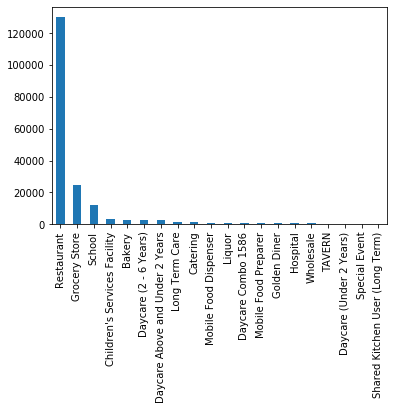

In [10]:
nInspectionsByType[:20].plot.bar()

The plot above present the number of inspections by type of business

From this analysis, we observe that most of the inspections are aimed at restaurants, especifically 130099 (from a total of 195212). We have also observed there are many categories that could be grouped, for instance 'Grocery & Restaurant' and 'Dollar Store with Grocery' or 'Gas Station' and 'Gas Station/Grocery'

### Relationship between columns

Now, we want to see how the columns of the dataset are related. 

First of all, we plot make a plot for each pair of columns in order to see how they could be connected to each other.

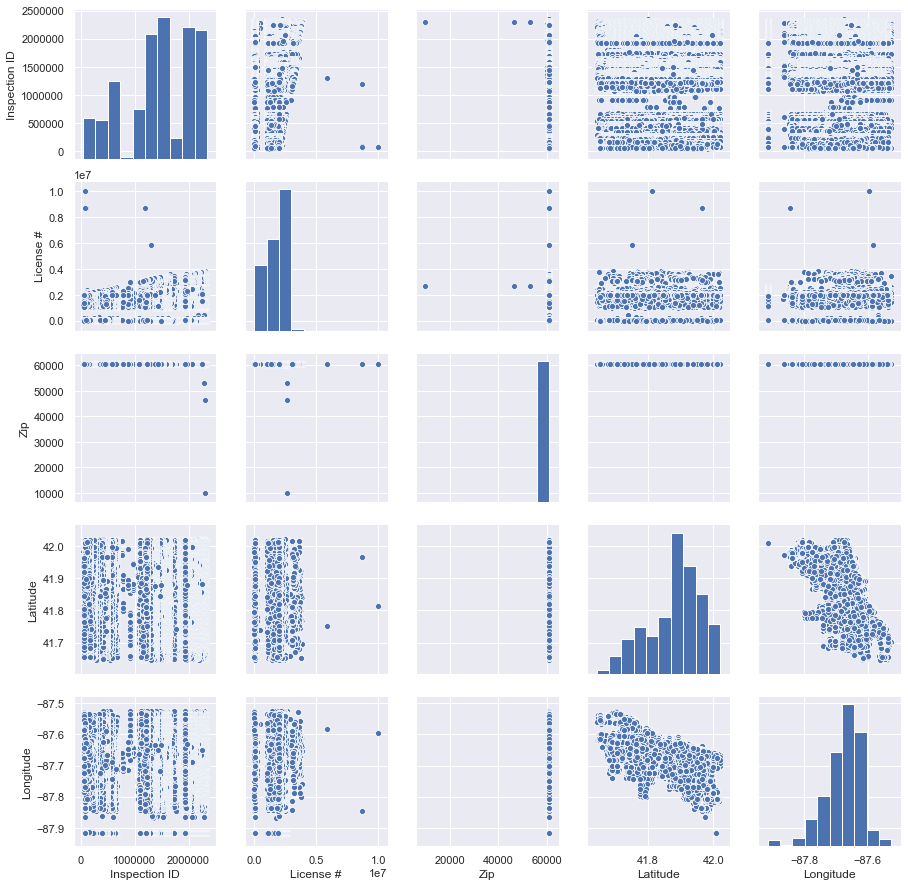

In [28]:
sns.set()
sns.pairplot(chicago_df_noNan)
plt.show()

From the previous plot, we can extract some interesting results:
- The plot (Latitude, Longitude) mainly shows the data points in space and gives a sense of the city's shape.

- ... (Add more results)

After looking at this plot, we could ask ourselves which of these variable are linearly correlated. And this is the next question we want to answer from our dataset.

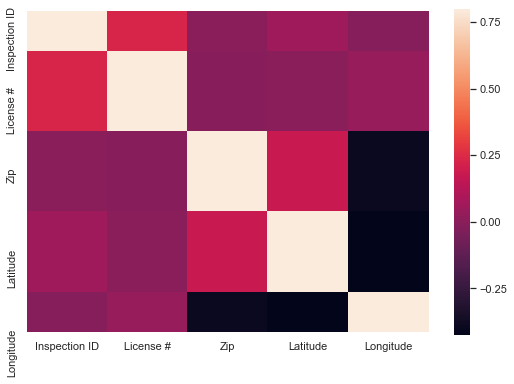

In [34]:
corrmat = chicago_df_noNan.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

*Make comments on the correlations between variables*

*Add final conclusions*

### Where are the inspections located?

Previously, we saw the plot of ('Latitute', 'Longitude') already creates a basic map with the location of the businesses within the city.

Let's formalize this map and understand better where the businesses subject to inspections are located

In [238]:
# New DataFrame with the zip codes and #inspections per zip code
businessesByZip = chicago_df_noNan.groupby('Zip')[['Inspection ID']].count()
businessesByZip = businessesByZip.rename(columns={'Inspection ID':'nInspections'})
businessesByZip.reset_index(inplace=True)
businessesByZip['Zip'] = businessesByZip['Zip'].astype(int).astype('str')
businessesByZip.head(3)

,Zip,nInspections
0,10014,1
1,46319,1
2,53061,1


In [239]:
m = folium.Map(location=[41.8781, -87.6298])
zip_geo = f'./zipCodesBoundaries.geojson'

In [240]:
folium.Choropleth(
    geo_data=zip_geo,
    name='choropleth',
    data=businessesByZip,
    columns=['Zip','nInspections'],
    key_on='feature.properties.zip',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Businesses per zip'
).add_to(m)

folium.LayerControl().add_to(m)

m

This map contains the number of inspections made by zip code area

The map shows us how the majority of inspections are located in downtown Chicago

Next tasks:
- See if there are inspections located outside these boundaries and try to find a map which could incldue them
- Create a similar plot for businesses location
- Create a comparison chart (inspections/businesses)